In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.spatial import distance

In [3]:
file_path = 'billionaires.csv'
file_path2024 = 'forbes_billionaires_2024.csv'

# main data
dataset2023 = pd.read_csv(file_path)

dataset_2023_gender = dataset2023.copy()
dataset2023_copy = dataset2023.copy()
dataset2024 = pd.read_csv(file_path2024)
dataset2024['Net Worth'] = dataset2024['Net Worth'].replace({'\$': '', ' B': ''}, regex=True).astype(float) * 1000

In [4]:
# Renaming columns for consistency
dataset2023_copy.rename(columns={'personName': 'Name', 'finalWorth': 'Net Worth 2023'}, inplace=True)
dataset2024.rename(columns={'Name': 'Name', 'Net Worth': 'Net Worth 2024'}, inplace=True)

# Merging the two datasets on the 'Name' column
merged_data = pd.merge(dataset2023_copy[['Name', 'Net Worth 2023']], dataset2024[['Name', 'Net Worth 2024', 'Source']], on='Name', how='inner')

# Calculating the percentage change in net worth
merged_data['Net Worth Change (%)'] = ((merged_data['Net Worth 2024'] - merged_data['Net Worth 2023']) / merged_data['Net Worth 2023']) * 100

# Getting the top 5 winners and losers
top_5_winners = merged_data.sort_values(by='Net Worth Change (%)', ascending=False).head(10)
top_5_losers = merged_data.sort_values(by='Net Worth Change (%)').head(10)

top_5_winners, top_5_losers

(                Name  Net Worth 2023  Net Worth 2024  \
 23  Prajogo Pangestu            5300         55900.0   
 15   Mark Zuckerberg           64400        122600.0   
 22      Gautam Adani           47200         77500.0   
 2         Jeff Bezos          114000        172200.0   
 11        Larry Page           79200        116100.0   
 13       Sergey Brin           76000        111400.0   
 1          Elon Musk          180000        251300.0   
 9      Steve Ballmer           80700        110900.0   
 21      Michael Dell           50100         68800.0   
 12    Amancio Ortega           77300         99100.0   
 
                          Source  Net Worth Change (%)  
 23       Petrochemicals, energy            954.716981  
 15                     Facebook             90.372671  
 22  Infrastructure, commodities             64.194915  
 2                        Amazon             51.052632  
 11                       Google             46.590909  
 13                       Goo

In [5]:
billionaires_data = pd.read_csv(file_path)

# Cleaning and converting the GDP column to a numeric format
billionaires_data['gdp_country'] = (
    billionaires_data['gdp_country']
    .str.replace('$', '')
    .str.replace(',', '')
    .str.strip()
    .astype(float)
)

# Summing the net worth of billionaires for each country
total_net_worth = billionaires_data.groupby('country')['finalWorth'].sum()

# Getting the unique GDP values for each country
gdp_by_country = billionaires_data.drop_duplicates('country').set_index('country')['gdp_country']

# Merging the total net worth with the GDP of each country
country_wealth_gdp = pd.DataFrame({
    'Total Net Worth (Millions $)': total_net_worth,
    'GDP (Millions $)': gdp_by_country / 1e6  # Converting GDP to millions for consistency
})

# Calculating the percentage of the total net worth of billionaires over the GDP for each country
country_wealth_gdp['Billionaires Wealth as % of GDP'] = (country_wealth_gdp['Total Net Worth (Millions $)'] / country_wealth_gdp['GDP (Millions $)']) * 100

# Displaying the result
print(country_wealth_gdp)

               Total Net Worth (Millions $)  GDP (Millions $)  \
country                                                         
Algeria                              4600.0      1.699882e+05   
Andorra                              1500.0      3.154058e+03   
Argentina                           11000.0      4.496634e+05   
Armenia                              1200.0      1.367280e+04   
Australia                          173500.0      1.392681e+06   
...                                     ...               ...   
United States                     4575100.0      2.142770e+07   
Uruguay                              1800.0      5.604591e+04   
Uzbekistan                          14400.0      5.792129e+04   
Vietnam                             12600.0      2.619212e+05   
NaN                                     NaN               NaN   

               Billionaires Wealth as % of GDP  
country                                         
Algeria                               2.706070  
Andorra

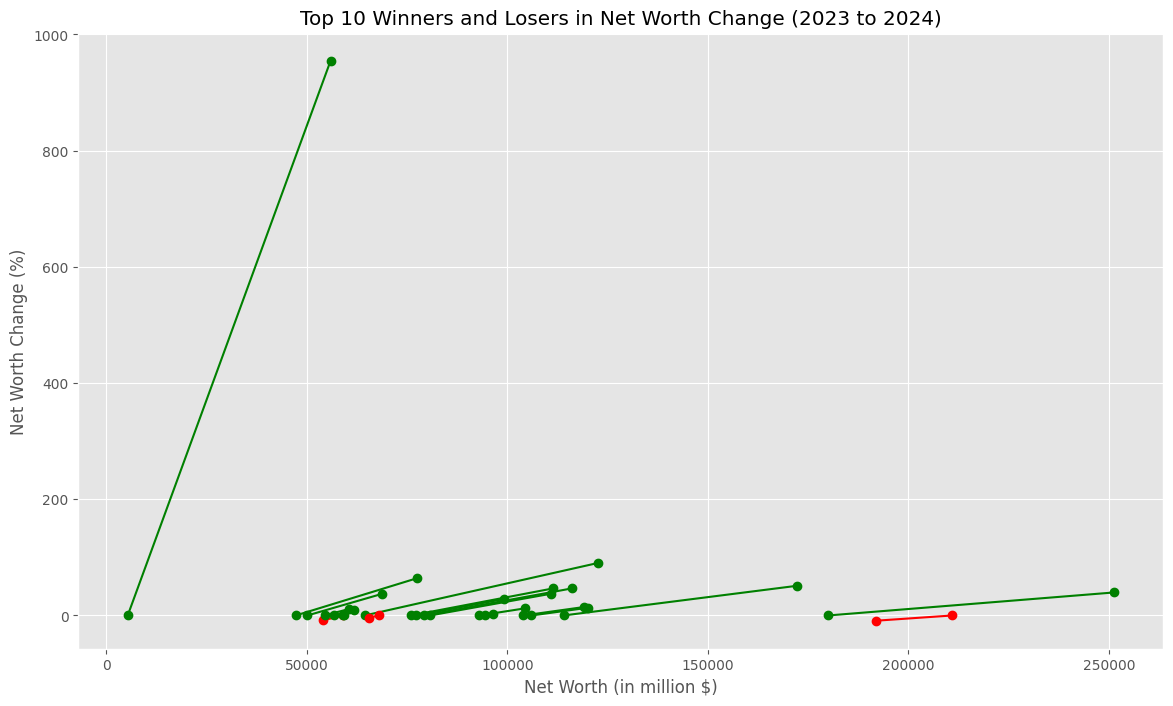

In [6]:
# Selecting the top 10 winners and top 10 losers
top_10_winners = merged_data.sort_values(by='Net Worth Change (%)', ascending=False).head(10)
top_10_losers = merged_data.sort_values(by='Net Worth Change (%)').head(10)

# Combining the winners and losers for the plot
top_10_winners_and_losers = pd.concat([top_10_winners, top_10_losers])

# Creating the plot
plt.figure(figsize=(14, 8))
plt.style.use('ggplot')  # Using ggplot style for better visuals


top_10_winners_and_losers['Color'] = ['green' if x >= 0 else 'red' for x in top_10_winners_and_losers['Net Worth Change (%)']]

# Plotting for each billionaire in the top 10 winners and losers
for _, row in top_10_winners_and_losers.iterrows():
    plt.plot([row['Net Worth 2023'], row['Net Worth 2024']],
             [0, row['Net Worth Change (%)']],
             color=row['Color'], marker='o')

plt.title('Top 10 Winners and Losers in Net Worth Change (2023 to 2024)')
plt.xlabel('Net Worth (in million $)')
plt.ylabel('Net Worth Change (%)')
plt.grid(True)

# Show the plot
plt.show()

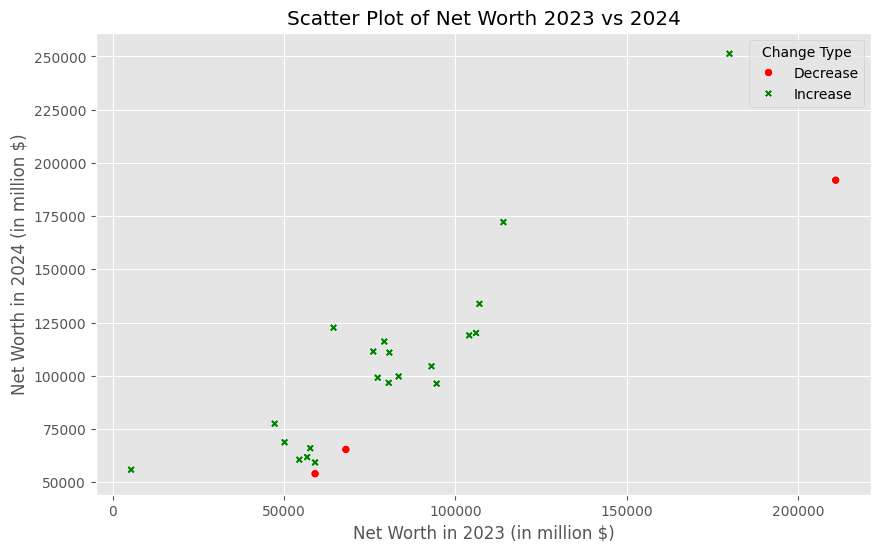

In [7]:
merged_data['Change Type'] = merged_data['Net Worth Change (%)'].apply(lambda x: 'Increase' if x >= 0 else 'Decrease')

# Scatter Plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=merged_data, x='Net Worth 2023', y='Net Worth 2024', hue='Change Type',
                          style='Change Type', palette={"Increase": "green", "Decrease": "red"})
plt.title('Scatter Plot of Net Worth 2023 vs 2024')
plt.xlabel('Net Worth in 2023 (in million $)')
plt.ylabel('Net Worth in 2024 (in million $)')
plt.grid(True)

# Show the plot
plt.show()

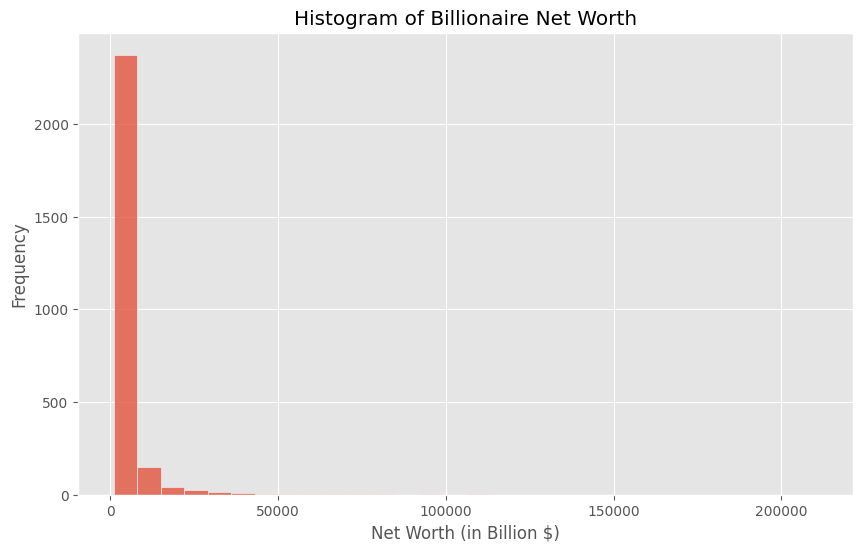

/var/folders/p5/9pt_428x1_58kc40jyglstlh0000gn/T/ipykernel_52254/1733019969.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataset2023['finalWorth'], shade=True)


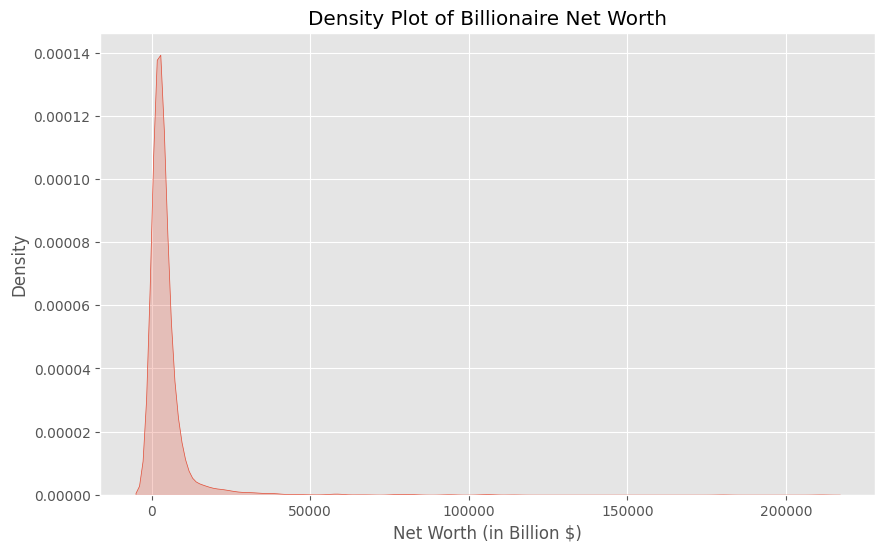

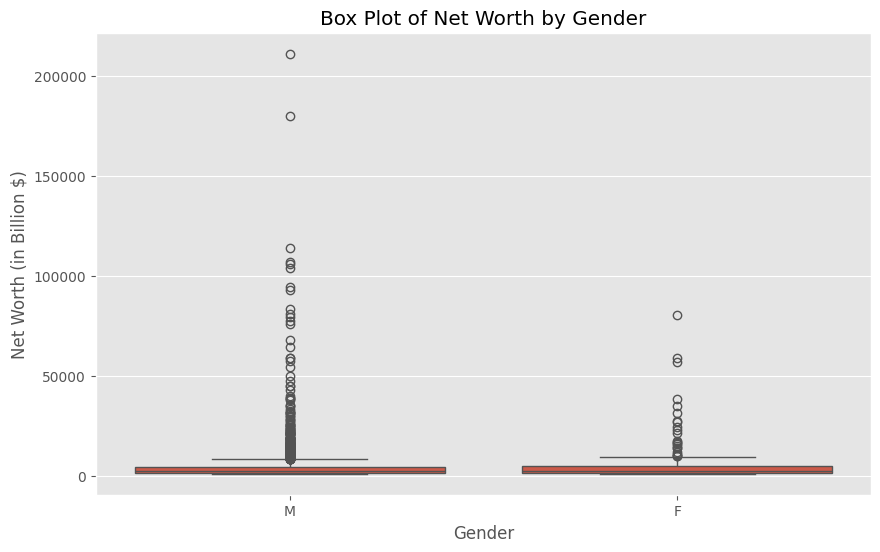

Skewness: 10.012367321086751, Kurtosis: 145.07368067526582


In [8]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(dataset2023['finalWorth'], kde=False, bins=30)
plt.title('Histogram of Billionaire Net Worth')
plt.xlabel('Net Worth (in Billion $)')
plt.ylabel('Frequency')
plt.show()

# Density Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(dataset2023['finalWorth'], shade=True)
plt.title('Density Plot of Billionaire Net Worth')
plt.xlabel('Net Worth (in Billion $)')
plt.show()

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='finalWorth', data=dataset2023)
plt.title('Box Plot of Net Worth by Gender')
plt.xlabel('Gender')
plt.ylabel('Net Worth (in Billion $)')
plt.show()

# Skewness and Kurtosis
skewness = dataset2023['finalWorth'].skew()
kurtosis = dataset2023['finalWorth'].kurtosis()
print(f"Skewness: {skewness}, Kurtosis: {kurtosis}")


In [9]:
# Assuming 'dataset' is your DataFrame name
billionaire_count_by_country = dataset2023.groupby('country')['personName'].count().reset_index()
billionaire_count_by_country.rename(columns={'personName': 'BillionaireCount'}, inplace=True)

# Extracting necessary country-specific data (assuming the first occurrence of each country has the relevant data)
country_specific_data = dataset2023.drop_duplicates(subset='country')[['country', 'gdp_country', 'population_country']]
country_specific_data.rename(columns={'gdp_country': 'GDP', 'population_country': 'Population'}, inplace=True)

# Calculate the total net worth of billionaires for each country (in billions)
billionare_worth_per_country = dataset2023.groupby('country')['finalWorth'].sum().reset_index()
billionare_worth_per_country['finalWorth'] = billionare_worth_per_country['finalWorth'] / 1000  # Convert from millions to billions
billionare_worth_per_country.rename(columns={'finalWorth': 'TotalNetWorthBillion'}, inplace=True)

# Merging the billionaire count with country-specific data
adjusted_dataset_2023 = billionaire_count_by_country.merge(country_specific_data, on='country', how='left')

# Merging the total net worth data with the adjusted_dataset_2023
adjusted_dataset_2023 = adjusted_dataset_2023.merge(billionare_worth_per_country, on='country', how='left')

# Convert GDP to numeric value and calculate the GDP per capita
adjusted_dataset_2023['GDP'] = adjusted_dataset_2023['GDP'].replace({'\$': '', ',': ''}, regex=True).astype(float)
adjusted_dataset_2023['Population'] = adjusted_dataset_2023['Population'].replace({',': ''}, regex=True).astype(float)
adjusted_dataset_2023['GDP per Capita'] = adjusted_dataset_2023['GDP'] / adjusted_dataset_2023['Population']

# Calculate the percentage of GDP that the total billionaire net worth represents for each country
adjusted_dataset_2023['PercentageOfGDP'] = (adjusted_dataset_2023['TotalNetWorthBillion'] * 1e9) / adjusted_dataset_2023['GDP'] * 100

# Displaying the merged data with the percentage of GDP
adjusted_dataset_2023[['country', 'BillionaireCount', 'TotalNetWorthBillion', 'GDP', 'Population', 'GDP per Capita', 'PercentageOfGDP']]


,country,BillionaireCount,TotalNetWorthBillion,GDP,Population,GDP per Capita,PercentageOfGDP
0,Algeria,1,4.6,1.699882e+11,43053054.0,3948.343279,2.706070
1,Andorra,1,1.5,3.154058e+09,77142.0,40886.391162,47.557781
2,Argentina,4,11.0,4.496634e+11,44938712.0,10006.148974,2.446274
3,Armenia,1,1.2,1.367280e+10,2957731.0,4622.733493,8.776548
4,Australia,43,173.5,1.392681e+12,25766605.0,54049.828812,12.457989
...,...,...,...,...,...,...,...
73,United Kingdom,82,370.7,2.827113e+12,66834405.0,42300.267126,13.112315
74,United States,754,4575.1,2.142770e+13,328239523.0,65280.682241,21.351335
75,Uruguay,1,1.8,5.604591e+10,3461734.0,16190.126957,3.211653
76,Uzbekistan,1,14.4,5.792129e+10,33580650.0,1724.841134,24.861326


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

# Assume 'data' is your combined and cleaned DataFrame
# Selecting features and target variable
X = dataset2024[['Country', 'Source', 'Age']].notna()
y = dataset2024['Net Worth 2024']

# Preprocessing
categorical_features = ['Country', 'Source']
numerical_features = ['Age']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

# Model
model = make_pipeline(preprocessor, DecisionTreeRegressor())

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))


RMSE: 72093.53438415959


In [11]:
# Recalculating the percentage of self-made billionaires for both males and females
# as the previous cell might not carry over the variable states

# Create a function to calculate the percentages to avoid repetition
def calculate_self_made_percentage(data):
    self_made_count = data[data['selfMade']].shape[0]
    total_count = data.shape[0]
    self_made_percentage = (self_made_count / total_count) * 100
    inherited_percentage = 100 - self_made_percentage
    return [self_made_percentage, inherited_percentage]

# Calculate percentages for male and female billionaires
male_percentages = calculate_self_made_percentage(male_data)
female_percentages = calculate_self_made_percentage(female_data)

# Define some fancy colors and explode parameters for the pie charts
colors = ['#FFD700', '#E5E4E2']  # Gold and silver colors
explode = (0.1, 0)  # 'explode' a slice if it's self-made

# Creating pie charts for the percentage of self-made billionaires by gender
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Male pie chart
axes[0].pie(
    male_percentages,
    explode=explode,
    labels=['Self Made', 'Inherited'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    shadow=True,
    wedgeprops={'edgecolor': 'black'}
)
axes[0].set_title('Male Billionaires')

# Female pie chart
axes[1].pie(
    female_percentages,
    explode=explode,
    labels=['Self Made', 'Inherited'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    shadow=True,
    wedgeprops={'edgecolor': 'black'}
)
axes[1].set_title('Female Billionaires')

plt.show()

NameError: name 'male_data' is not defined

In [ ]:
# Filter data based on gender and drop rows with missing 'finalWorth' or 'age'
male_data = dataset_2023_gender[dataset_2023_gender['gender'] == 'M'][['personName', 'finalWorth', 'age', 'selfMade']].dropna()
female_data = dataset_2023_gender[dataset_2023_gender['gender'] == 'F'][['personName', 'finalWorth', 'age', 'selfMade']].dropna()

# Creating a 2x1 subplot matrix with log scale for net worth on the x-axis
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# Define a color map for self-made status
color_map = {True: 'green', False: 'blue'}

# Plotting male billionaires, color by self-made status
for self_made_status, color in color_map.items():
    subset = male_data[male_data['selfMade'] == self_made_status]
    label = 'Self Made' if self_made_status else 'Inherited'
    axes[0].scatter(subset['finalWorth'], subset['age'], c=color, alpha=0.5, label=label)

# Setting labels and scale for male billionaires
axes[0].set_title('Male Billionaires')
axes[0].set_ylabel('Age')
axes[0].set_xscale('log')
axes[0].set_xlabel('Net Worth (in billions, log scale)')
axes[0].legend()

# Plotting female billionaires, color by self-made status
color_map = {True: 'green', False: 'red'}
for self_made_status, color in color_map.items():
    subset = female_data[female_data['selfMade'] == self_made_status]
    label = 'Self Made' if self_made_status else 'Inherited'
    axes[1].scatter(subset['finalWorth'], subset['age'], c=color, alpha=0.5, label=label)

# Setting labels for female billionaires
axes[1].set_title('Female Billionaires')
axes[1].set_ylabel('Age')
axes[1].set_xlabel('Net Worth (in billions, log scale)')
axes[1].legend()

plt.tight_layout()
plt.show()

: 

In [ ]:
merged_data = adjusted_dataset_2023
merged_data_adjusted = merged_data.replace([np.inf, -np.inf], np.nan).dropna(subset=['BillionaireCount', 'GDP per Capita', 'GDP', 'Population'])
print(merged_data.head())

# We'll conduct a Pearson correlation test between 'BillionaireCount' and 'GDP per Capita'
pearson_corr, p_value = pearsonr(merged_data_adjusted['BillionaireCount'], merged_data_adjusted['GDP per Capita'])
pearson_corr2, p_value2 = pearsonr(merged_data_adjusted['BillionaireCount'], merged_data_adjusted['GDP'])
pearson_corr3, p_value3 = pearsonr(merged_data_adjusted['BillionaireCount'], merged_data_adjusted['Population'])

# Now let's formulate the null and alternative hypotheses:
# Null Hypothesis (H0): There is no relationship between GDP per capita and the number of billionaires in a country.
# Alternative Hypothesis (H1): There is a relationship between GDP per capita and the number of billionaires in a country.

pearson_corr, p_value
print(f"For the first hypothesis testing, which is about the number of billionaires and GDP per capita, Pearson correlation is {pearson_corr:.2f} and p-value is {p_value:.4f}")


pearson_corr2, p_value2
print(f"For the first hypothesis testing, which is about the number of billionaires and GDP, Pearson correlation is {pearson_corr2:.2f} and p-value is {p_value2:.4f}")

pearson_corr3, p_value3
print(f"For the first hypothesis testing, which is about the number of billionaires and Population, Pearson correlation is {pearson_corr3:.2f} and p-value is {p_value3:.4f}")



: 

In [ ]:
selected_columns = merged_data[['BillionaireCount', 'Population']]

# Calculate the mean and covariance matrix
mean = selected_columns.mean()
cov_matrix = selected_columns.cov()

# Calculate the Mahalanobis Distance for each data point
mahalanobis_distances = []
for index, row in selected_columns.iterrows():
    mahalanobis_dist = distance.mahalanobis(row, mean, np.linalg.inv(cov_matrix))
    mahalanobis_distances.append(mahalanobis_dist)

merged_data_with_distance = merged_data.copy()

# Add the Mahalanobis Distance as a new column in the DataFrame

merged_data_with_distance['MahalanobisDistance'] = mahalanobis_distances
sorted_df = merged_data_with_distance[['country', 'MahalanobisDistance']].sort_values(by='MahalanobisDistance', ascending=False)

# Find the row for Singapore
singapore_values = sorted_df[sorted_df['country'] == 'Singapore']

# Print the values for Singapore
print(singapore_values)

NameError: name 'merged_data' is not defined

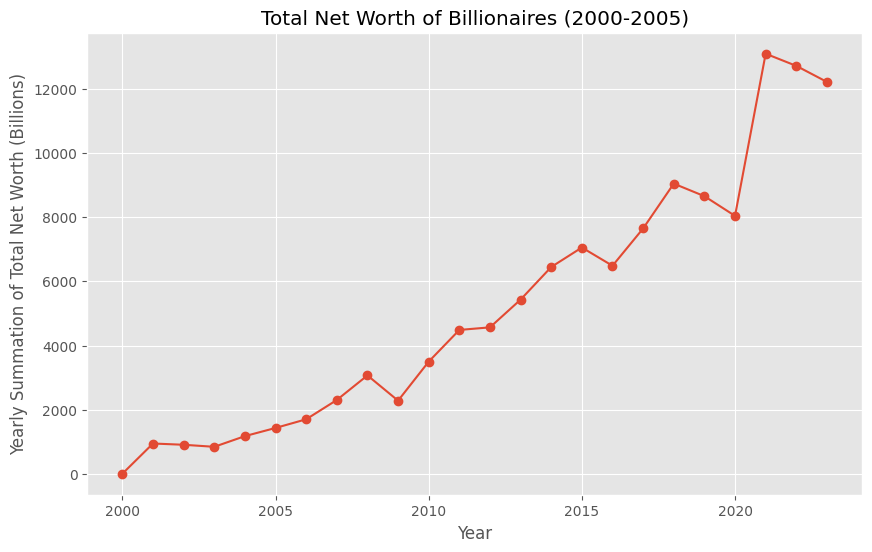

In [37]:
dataset2000_2023 = pd.read_csv('billionaires_2000_2023.csv')
dataset2000_2023
dataset2000_2023 = dataset2000_2023[['year', 'full_name', 'net_worth', 'country_of_citizenship','business_industries']].dropna()
dataset2000_2023.head()

import ast  # Import the ast module to parse the string representation of the list


def process_business_industries(row):
    # Check if the value in the 'business_industries' column is a string
    if isinstance(row['business_industries'], str):
        try:
            # Attempt to parse the string representation of the list
            industries_list = ast.literal_eval(row['business_industries'])
            # Check if it's a list and get the first value if available
            if isinstance(industries_list, pd.Series) and len(industries_list) > 0:
                return industries_list[0]
            else:
                return row['business_industries']  # Return the original value if not a list
        except (ValueError, SyntaxError):
            return row['business_industries']  # Return the original value if parsing fails
    else:
        return row['business_industries']  # If it's already a non-string type, return it as is

# Apply the custom function to the 'business_industries' column
dataset2000_2023['business_industries'] = dataset2000_2023.apply(process_business_industries, axis=1)

# Now, the 'business_industries' column should contain the desired values
dataset2000_2023

# Convert 'net_worth' to numeric
dataset2000_2023['net_worth'] = dataset2000_2023['net_worth'].str.rstrip('B').astype(float)

# Filter data for years between 2000 and 2005
filtered_df = dataset2000_2023[(dataset2000_2023['year'] >= 2000) & (dataset2000_2023['year'] <= 2023)]

# Group by 'year' and calculate the total net worth of all billionaires for each year
yearly_sum = filtered_df.groupby('year')['net_worth'].sum()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(yearly_sum.index, yearly_sum.values, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Yearly Summation of Total Net Worth (Billions)')
plt.title('Total Net Worth of Billionaires (2000-2005)')

# Show the plot
plt.grid(True)
plt.show()
